# Pandas basics <hr style="border:2.5px solid #126782"></hr>

Data Analyst : Eugene John Mendez <br>
Department : Electrical Engineering 

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [146]:
data = {
    "name": ['Genry', 'sugar', 'cream-o'],
    "age": [22, 32, 25],
    "sex": ['M', 'F', 'F']
}
data 

{'name': ['Genry', 'sugar', 'cream-o'],
 'age': [22, 32, 25],
 'sex': ['M', 'F', 'F']}

In [147]:
df = pd.DataFrame(data)
df

,name,age,sex
0,Genry,22,M
1,sugar,32,F
2,cream-o,25,F


# Correlation

In [148]:
device = {
    "Current": [2, 3.5, 1.8, 4.2, 2.7], 
    "Power": [100, 200, 90, 210, 110], 
}
device

{'Current': [2, 3.5, 1.8, 4.2, 2.7], 'Power': [100, 200, 90, 210, 110]}

In [149]:
df = pd.DataFrame(device)
df

,Current,Power
0,2.0,100
1,3.5,200
2,1.8,90
3,4.2,210
4,2.7,110


In [150]:
df.cov()

,Current,Power
Current,1.023,56.15
Power,56.150,3370.00


In [151]:
df.corr()

,Current,Power
Current,1.000000,0.956306
Power,0.956306,1.000000


In [152]:
df.describe()

,Current,Power
count,5.000000,5.000000
mean,2.840000,142.000000
std,1.011435,58.051701
min,1.800000,90.000000
25%,2.000000,100.000000
50%,2.700000,110.000000
75%,3.500000,200.000000
max,4.200000,210.000000


In [153]:
df['Current'].mean()

2.84

## Scatter Plot

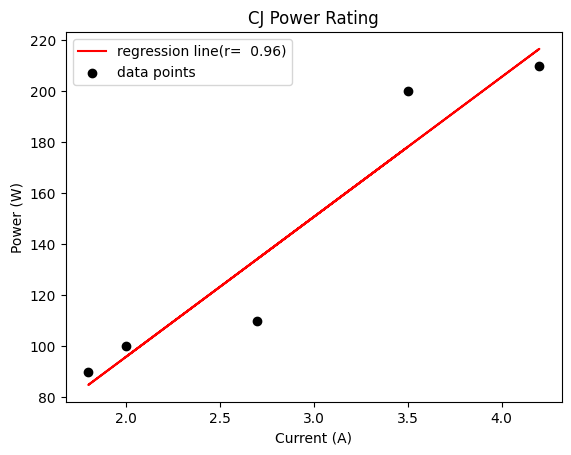

In [154]:
x = df ['Current']
y = df ['Power']

# regression line 
m, b, r_value, p_value, std_err = stats.linregress(x,y)
line = m*x + b

plt.plot(x,line, 
         color='red',
         label=f'regression line(r= {r_value: 0.2f})') 


#Scatter 
plt.scatter(x,y,
           color = 'black', 
            label = 'data points')
plt.title('CJ Power Rating')
plt.ylabel('Power (W)')
plt.xlabel("Current (A)")
plt.legend()
plt.show()

# Resistance test 

In [155]:
resistance =  pd.read_csv(r"resistance-test.csv")
resistance

,Test No.,Jaguar,Panther
0,1,10.6,10.1
1,2,9.1,11.0
2,3,9.3,9.1
3,4,9.8,20.0
4,5,10.5,9.2
5,6,10.4,10.8
6,7,9.5,9.9
7,8,11.0,9.2
8,9,10.4,9.1
9,10,3.0,9.1


In [156]:
resistance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Test No.  11 non-null     int64  
 1   Jaguar    11 non-null     float64
 2   Panther   10 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 392.0 bytes


In [157]:
jag_mean = resistance['Jaguar'].mean()
jag_mean

9.399999999999999

In [158]:
pan_mean = resistance['Panther'].mean()
pan_mean

10.75

In [159]:
resistance['Panther'] = resistance['Panther'].fillna(5)

In [160]:
resistance

,Test No.,Jaguar,Panther
0,1,10.6,10.1
1,2,9.1,11.0
2,3,9.3,9.1
3,4,9.8,20.0
4,5,10.5,9.2
5,6,10.4,10.8
6,7,9.5,9.9
7,8,11.0,9.2
8,9,10.4,9.1
9,10,3.0,9.1


# Bar Graph 

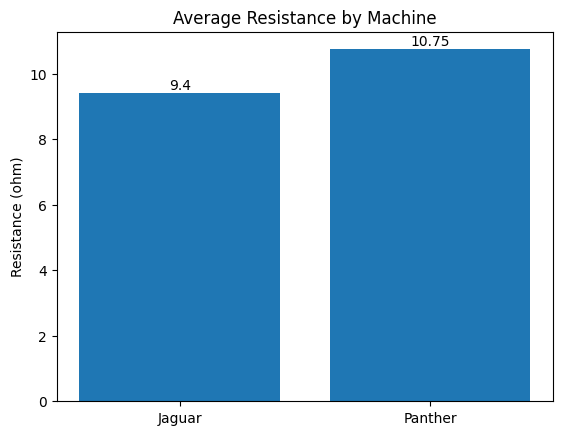

In [161]:
bars = plt.bar(['Jaguar', 'Panther'],[jag_mean, pan_mean])
plt.title('Average Resistance by Machine')
plt.ylabel('Resistance (ohm)')

#bar labels
plt.bar_label(bars, padding=1)
plt.show()